<a href="https://colab.research.google.com/github/meiladrahmani556/Disso/blob/main/notebooks/04_model_1_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard imports
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Paths
DATA_DIR = "../data"

In [13]:
!mkdir -p /content/data
!kaggle datasets download -d puneet6060/intel-image-classification -p /content/data --unzip

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 98% 338M/346M [00:04<00:00, 101MB/s] 
100% 346M/346M [00:04<00:00, 77.5MB/s]


In [6]:
%%writefile kaggle.json
{
  "username": "meiladrahmani",
  "key": "KGAT_92da668157bd4281a45c8eb0fec30e6f"
}

Writing kaggle.json


In [7]:
!mkdir -p /root/.config/kaggle
!cp kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

!kaggle datasets list | head

ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                         Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        266  1.0              
suvidyasonawane/student-academic-placement-performance-dataset   Student Academic Placement Performance Dataset           94469  2026-01-11 02:02:47.837000              0         23  1.0              
kundanbedmutha/exam-score-prediction-dataset                     Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        300  1.0          

In [1]:
# Standard imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Image parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10

In [15]:
import os
print("Contents of /content:", os.listdir("/content"))
print("Does /content/data exist?", os.path.exists("/content/data"))
if os.path.exists("/content/data"):
    print("Contents of /content/data:", os.listdir("/content/data")[:20])

Contents of /content: ['.config', 'data', 'kaggle.json', 'sample_data']
Does /content/data exist? True
Contents of /content/data: ['seg_pred', 'seg_test', 'seg_train']


In [16]:
!mkdir -p /content/data
!kaggle datasets download -d puneet6060/intel-image-classification -p /content/data --unzip

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 99% 342M/346M [00:00<00:00, 426MB/s]
100% 346M/346M [00:00<00:00, 468MB/s]


In [17]:
import os
print("Contents of /content/data:", os.listdir("/content/data")[:50])

# If the dataset is inside a folder, show inside it too:
for item in os.listdir("/content/data"):
    path = os.path.join("/content/data", item)
    if os.path.isdir(path):
        print(f"Inside {path}:", os.listdir(path)[:20])


Contents of /content/data: ['seg_pred', 'seg_test', 'seg_train']
Inside /content/data/seg_pred: ['seg_pred']
Inside /content/data/seg_test: ['seg_test']
Inside /content/data/seg_train: ['seg_train']


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

IMG_SIZE = (150, 150)
BATCH_SIZE = 32
SEED = 42

DATA_DIR = "/content/data"
TRAIN_DIR = os.path.join(DATA_DIR, "seg_train", "seg_train")
TEST_DIR  = os.path.join(DATA_DIR, "seg_test", "seg_test")

print("TRAIN_DIR:", TRAIN_DIR, "exists?", os.path.exists(TRAIN_DIR))
print("TEST_DIR :", TEST_DIR,  "exists?", os.path.exists(TEST_DIR))
print("Train classes:", os.listdir(TRAIN_DIR))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    seed=SEED
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    seed=SEED
)

TRAIN_DIR: /content/data/seg_train/seg_train exists? True
TEST_DIR : /content/data/seg_test/seg_test exists? True
Train classes: ['glacier', 'buildings', 'sea', 'street', 'mountain', 'forest']
Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(6, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,637,126 (40.58 MB)

 Trainable params: 10,637,126 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,637,126 (40.58 MB)

 Trainable params: 10,637,126 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.4878 - loss: 1.5931 - val_accuracy: 0.7040 - val_loss: 0.8248
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.7389 - loss: 0.7075 - val_accuracy: 0.7143 - val_loss: 0.7628
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.8318 - loss: 0.4750 - val_accuracy: 0.7832 - val_loss: 0.6285
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.9107 - loss: 0.2667 - val_accuracy: 0.7892 - val_loss: 0.6890
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.9635 - loss: 0.1257 - val_accuracy: 0.7810 - val_loss: 0.8171
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.9835 - loss: 0.0667 - val_accuracy: 0.7864 - val_loss: 0.8979
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.9905 - loss: 0.0413 - val_accuracy: 0.7689 - val_loss: 1.0259
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 415s 1s/step - accuracy: 0.9911 - loss: 0.0352 - val_accuracy: 0.787

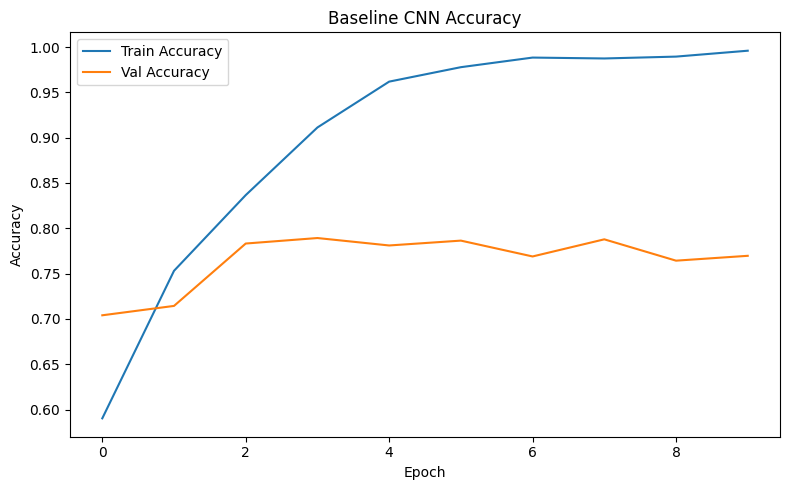

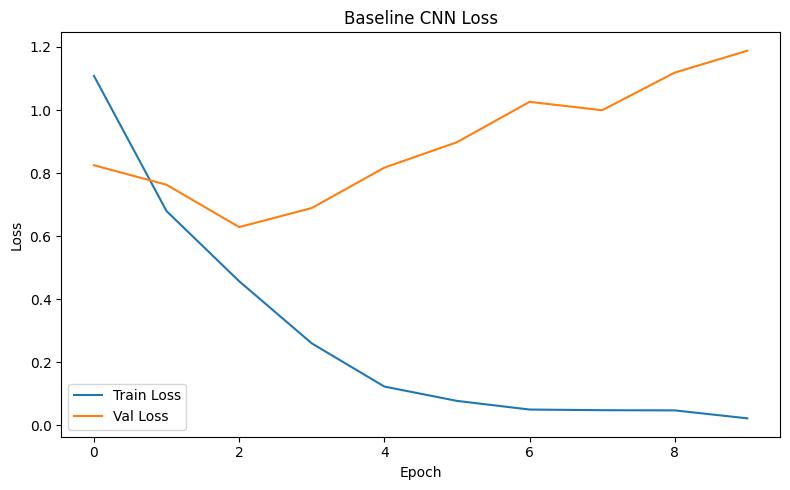

In [23]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Baseline CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Baseline CNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
## Baseline CNN Results

A baseline CNN model was trained using normalised images and an 80/20 train-validation split. Training and validation curves were generated to monitor learning behaviour and potential overfitting. This baseline provides a reference point for subsequent improvements in Model 2 and Model 3.
